In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

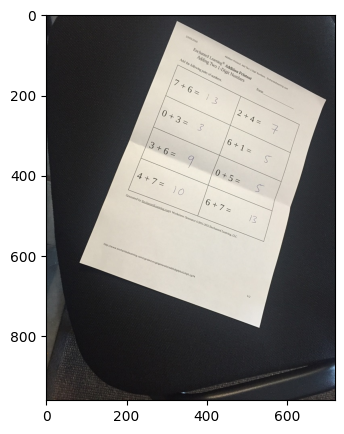

In [5]:
img=cv2.imread("../img/scan.jpg")
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

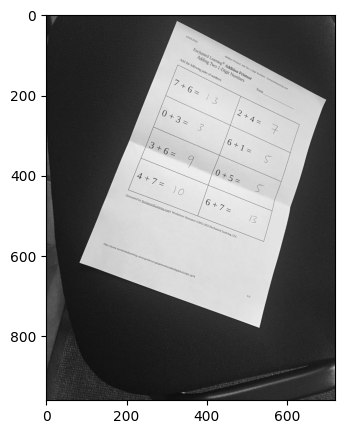

In [176]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(14, 5))
plt.imshow(imgGray,cmap="grey")
plt.show()

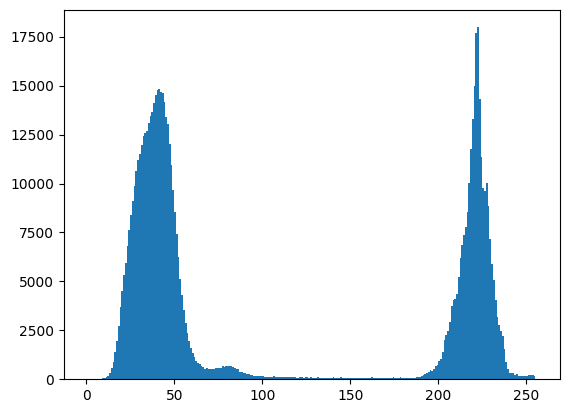

In [177]:
plt.hist(imgGray.ravel(),256,[0,256])
plt.show()

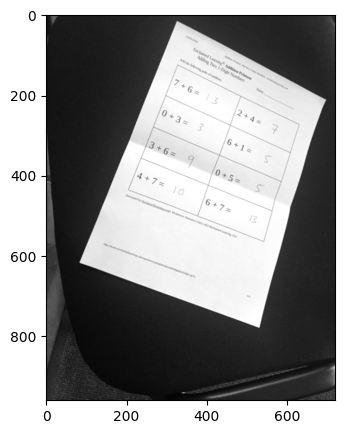

In [193]:
weight=2
kernel=np.array([[1,weight/2,1],[weight/2,weight,weight/2],[1,weight/2,1]])/9
imgBlur=cv2.filter2D(imgGray,-1,kernel)
plt.figure(figsize=(14, 5))
plt.imshow(imgBlur,cmap="grey")
plt.show()

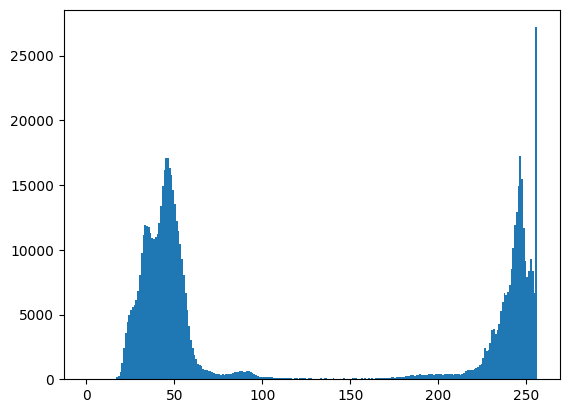

In [194]:
plt.hist(imgBlur.ravel(),256,[0,256])
plt.show()

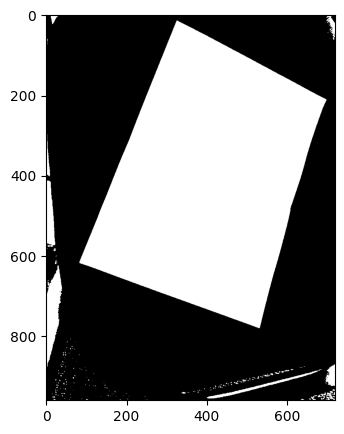

In [200]:
thresh=70
imgThresh = (imgBlur > thresh).astype(np.uint8) * 255

plt.figure(figsize=(14, 5))
plt.imshow(imgThresh,cmap="grey")
plt.show()

In [201]:
contours,_=cv2.findContours(imgThresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours,key=cv2.contourArea,reverse=True)

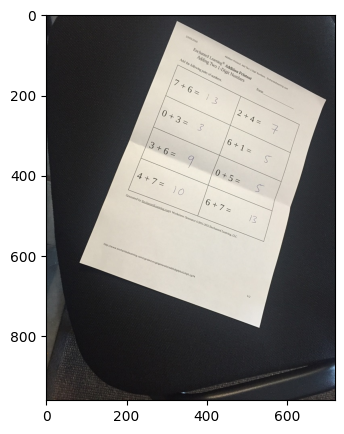

In [204]:
max_area = 0
rows, cols, ch = img.shape
pts1 = None
pts2 = np.float32([[0, 0], [0, rows], [cols, rows], [cols, 0]]) 

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.015 * peri, True)
        
        if area > max_area and len(approx) == 4:
            pts1 = np.float32([pt[0] for pt in approx])  # Koordinatları düz bir diziye dönüştür
            max_area = area
            document_contour = approx

newImg = img.copy()

plt.figure(figsize=(14, 5))
plt.imshow(newImg[..., ::-1])
plt.show()

In [205]:
# Perspektif transformasyonunu uygula
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(newImg, matrix, (cols, rows))

In [206]:
warpedGray=cv2.cvtColor(warped,cv2.COLOR_BGR2GRAY)

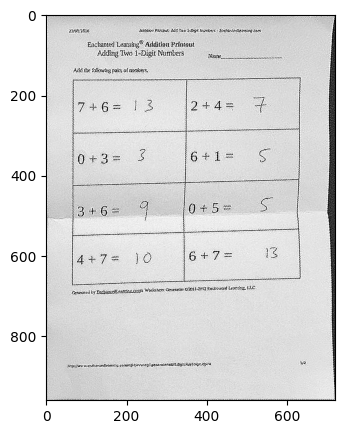

In [223]:
weight=5
kernel=np.array([[0,-weight,0],[-weight,weight*4+1,-weight],[0,-weight,0]])
sharpened=cv2.filter2D(warpedGray,-1,kernel)
plt.figure(figsize=(14, 5))
plt.imshow(sharpened,cmap="grey")
plt.show()

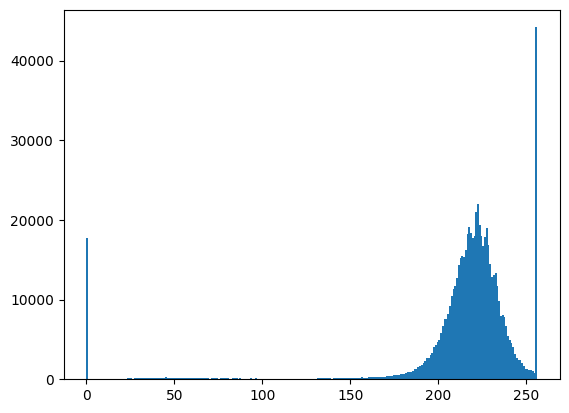

In [224]:
plt.hist(sharpened.ravel(),256,[0,256])
plt.show()

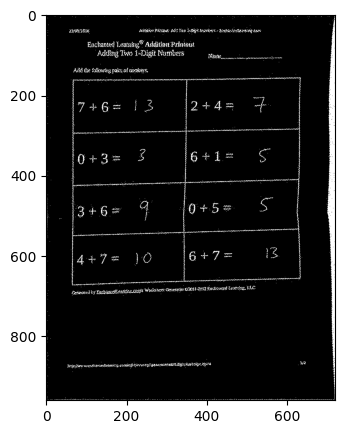

In [225]:
thresh=130
imgThresh = (sharpened < thresh).astype(np.uint8) * 255

plt.figure(figsize=(14, 5))
plt.imshow(imgThresh,cmap="grey")
plt.show()

In [226]:
import pytesseract as pyt

In [227]:
pyt.pytesseract.tesseract_cmd="C:\\Users\\Administrator\\AppData\\Local\\Tesseract-OCR\\tesseract.exe"
ocr_text=pyt.image_to_string(warped)
print(ocr_text)

avosa03s dct Peto: hit 1g eben nceaeneg ot
Enchanted Learning” Addition Printout
Adding Two 1-Digit Numbers

Add the SoSowing pats of members

7+6= ! 3 iD ee

O+3= $ 6+1= §

cl Nts asa S:

A+7=

eomoted by EachassndLeaminecosss Worksheet Gountor ©2011-2012 fschaates Learn. UC

tp itm encrarseeamang coreg BI NENGEOAROISBATEERL AI. RTS


